In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:

# Load data
df = pd.read_csv("Titanic-Dataset.csv")


In [18]:

# Show first few rows
print("First 5 rows:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

print("\nMedian values:")
print(df.median(numeric_only=True))

print("\nStandard deviation:")
print(df.std(numeric_only=True))

# Numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

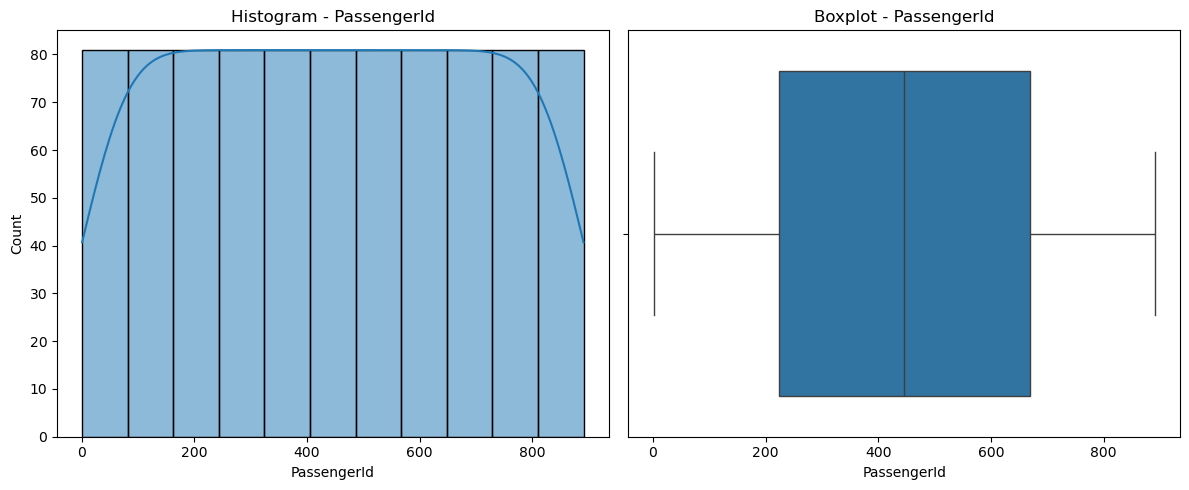

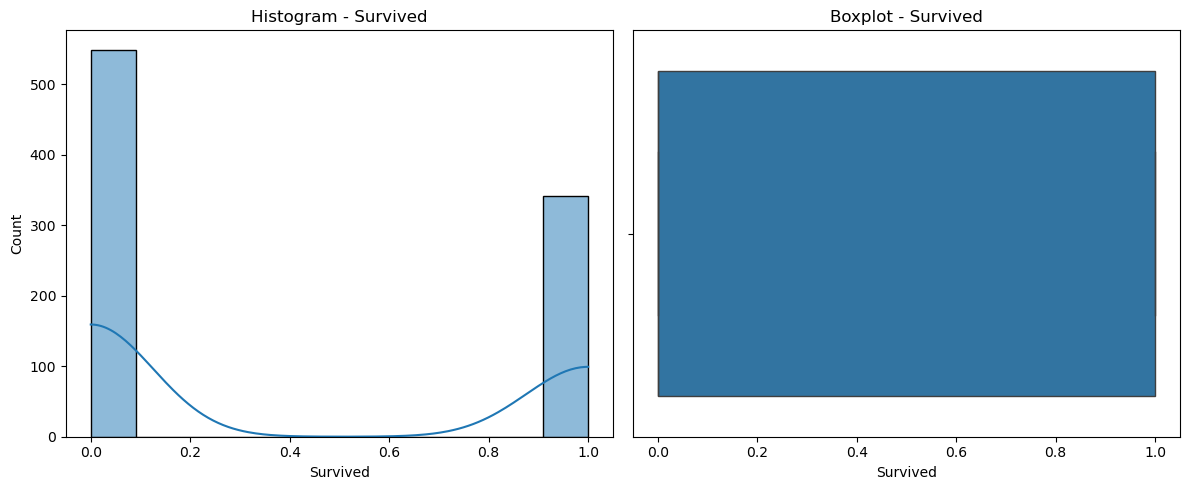

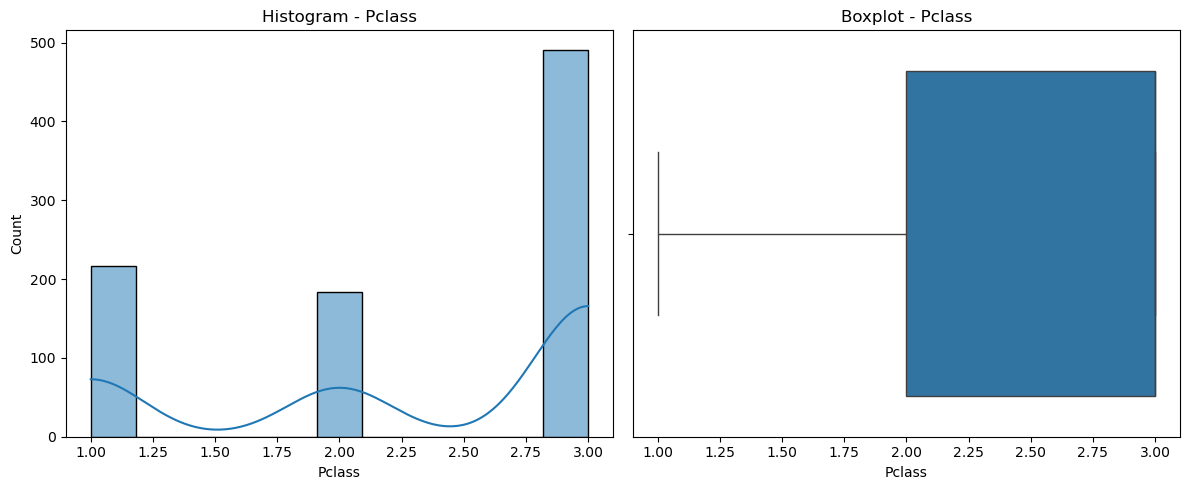

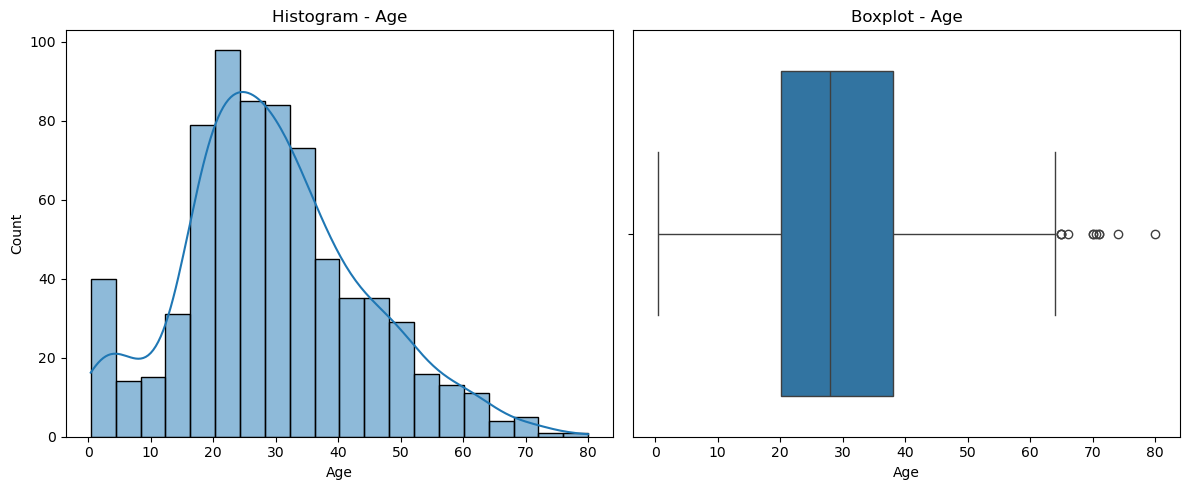

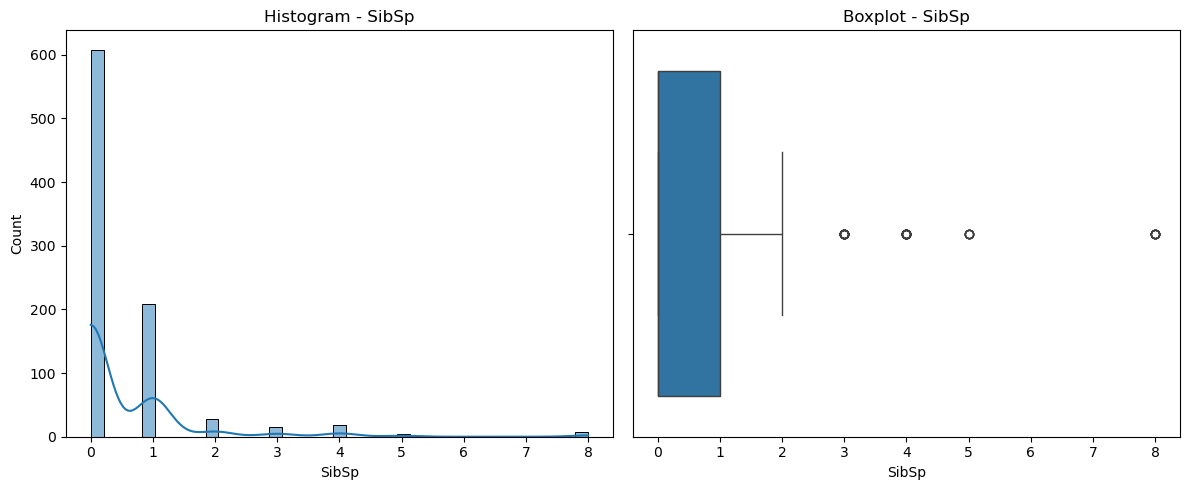

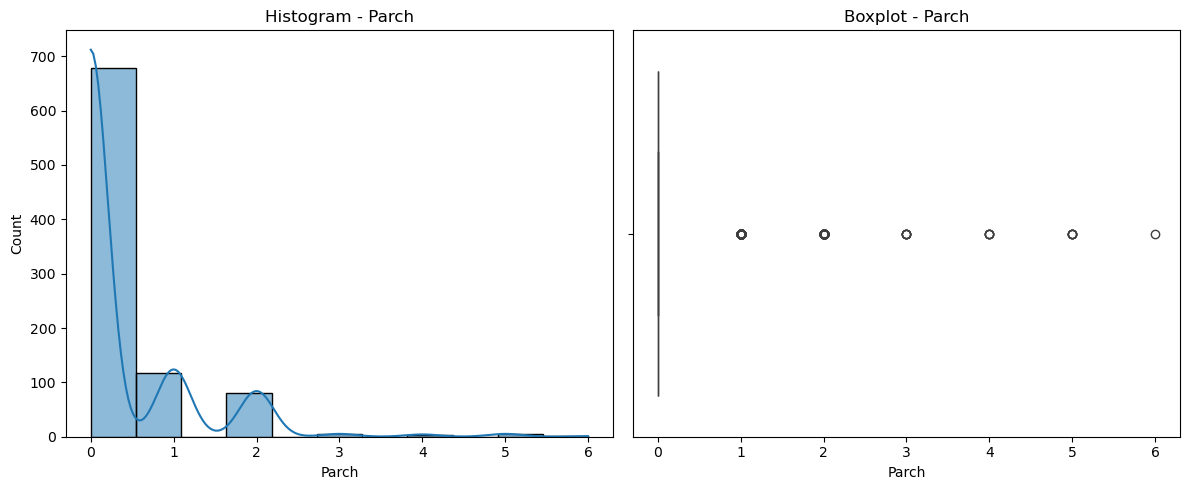

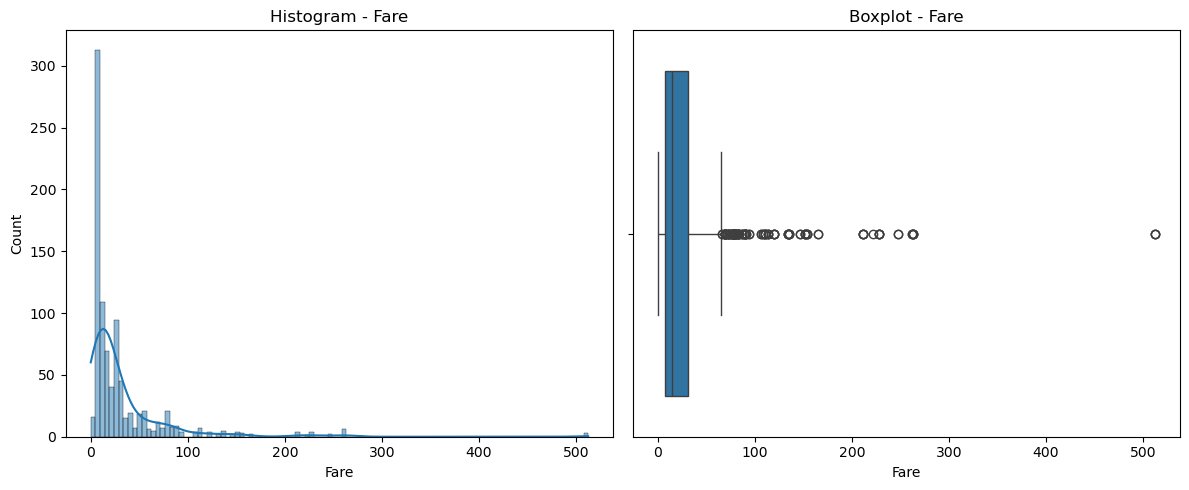

In [19]:

# Histograms and boxplots (STATIC: visible on GitHub)
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram - {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')

    plt.tight_layout()
    plt.show()


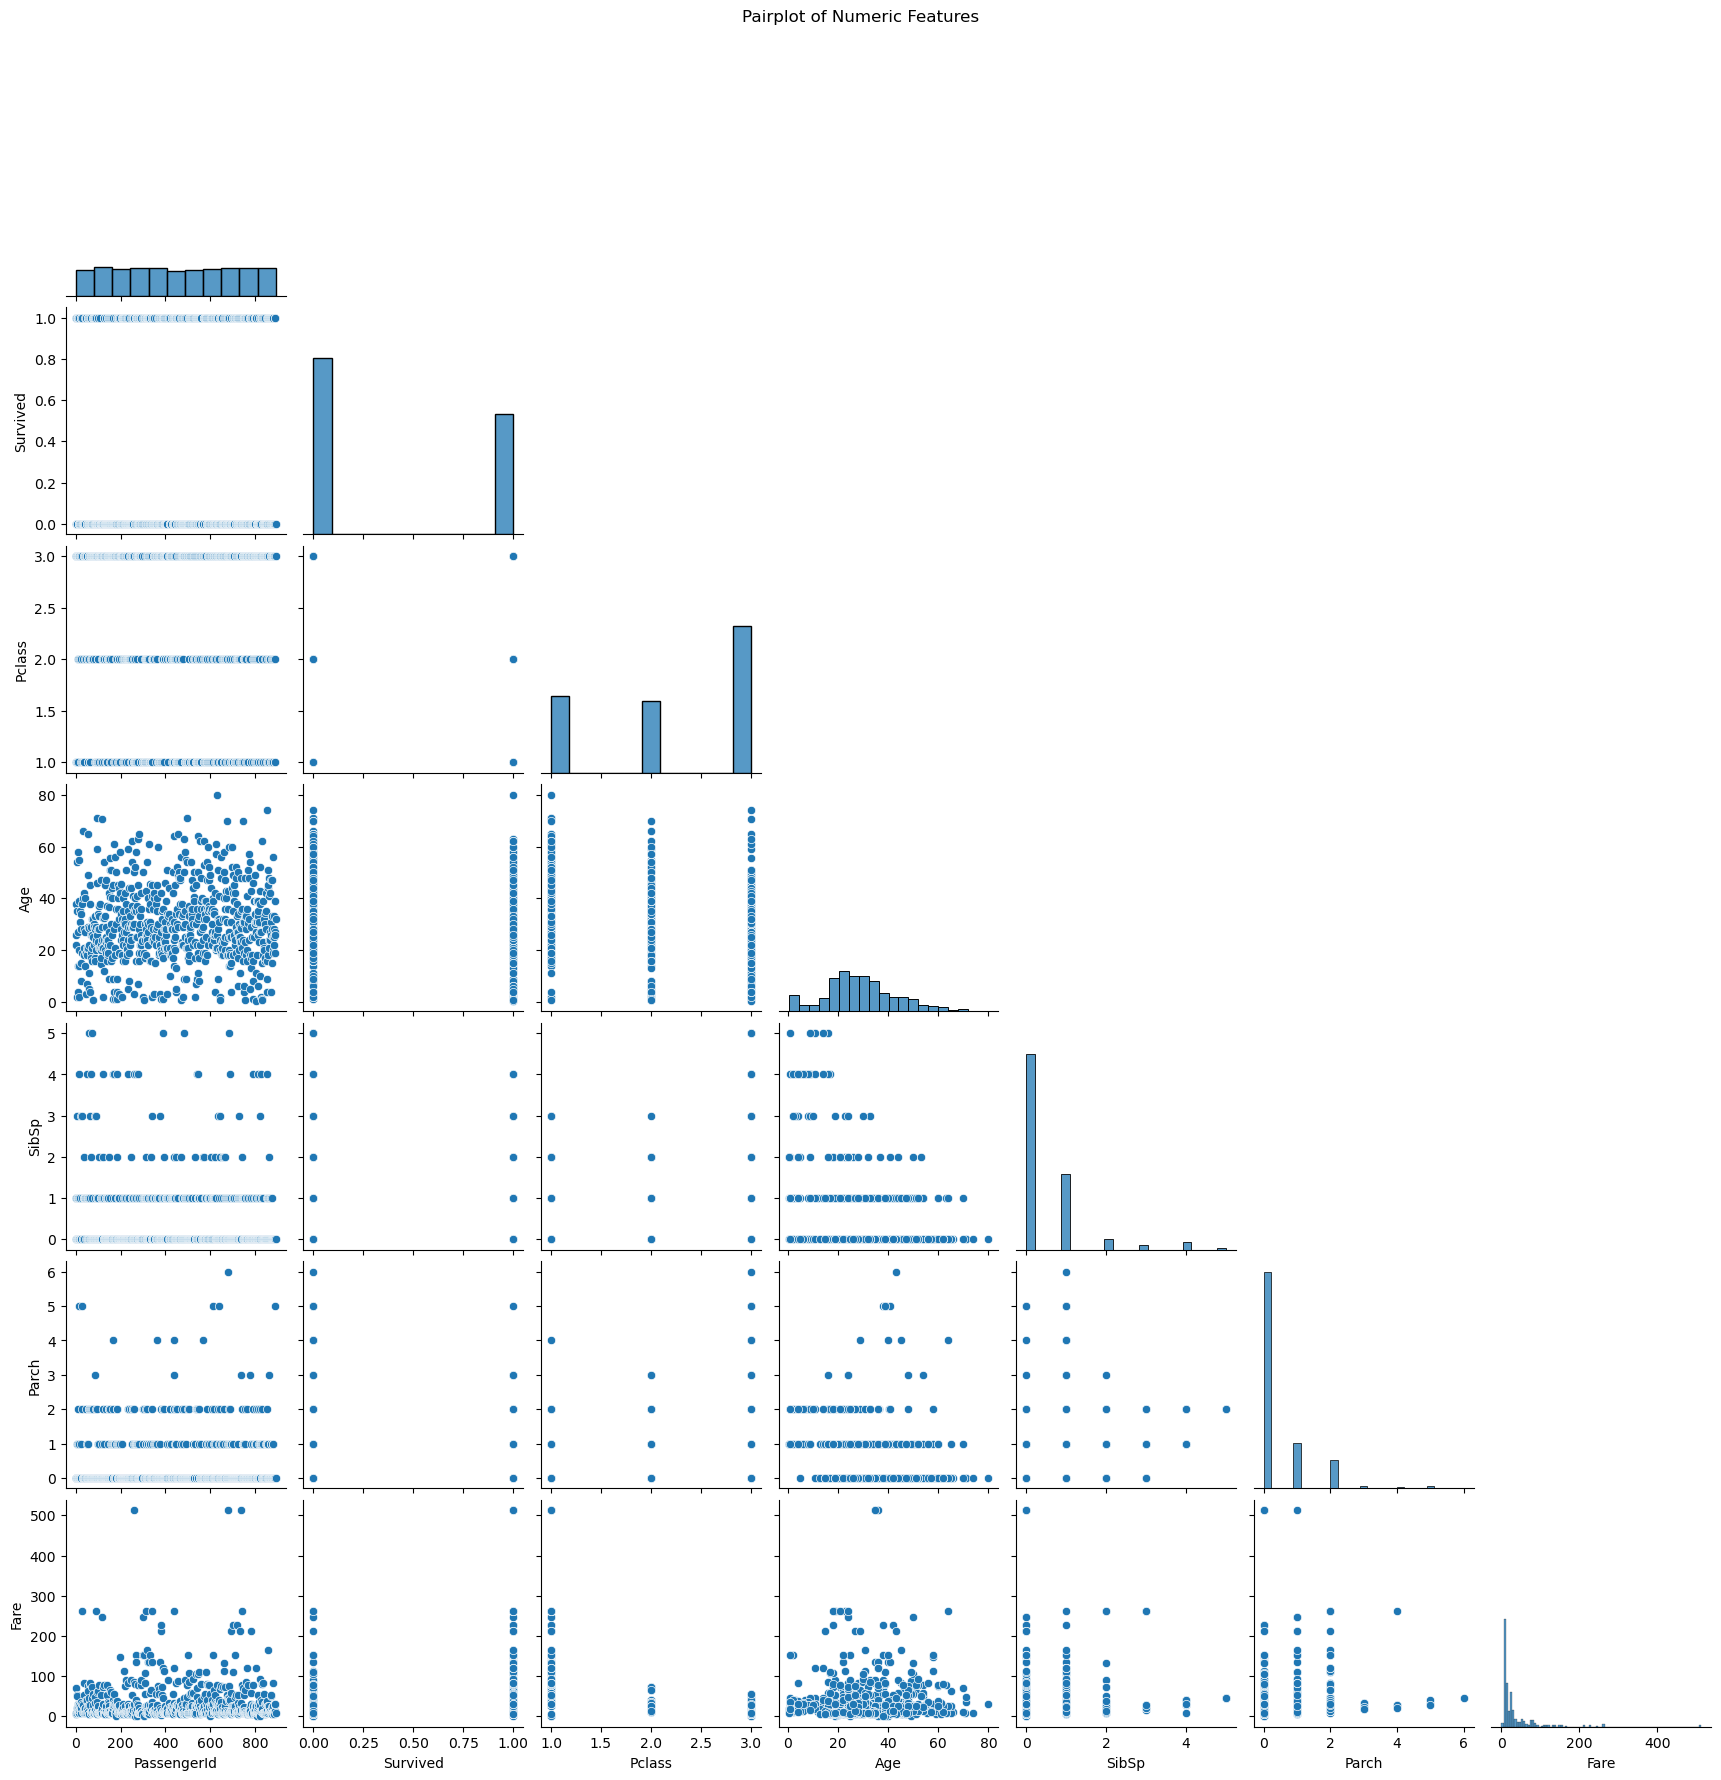

In [20]:

# Pairplot (static)
sns.pairplot(df[numeric_cols].dropna(), corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


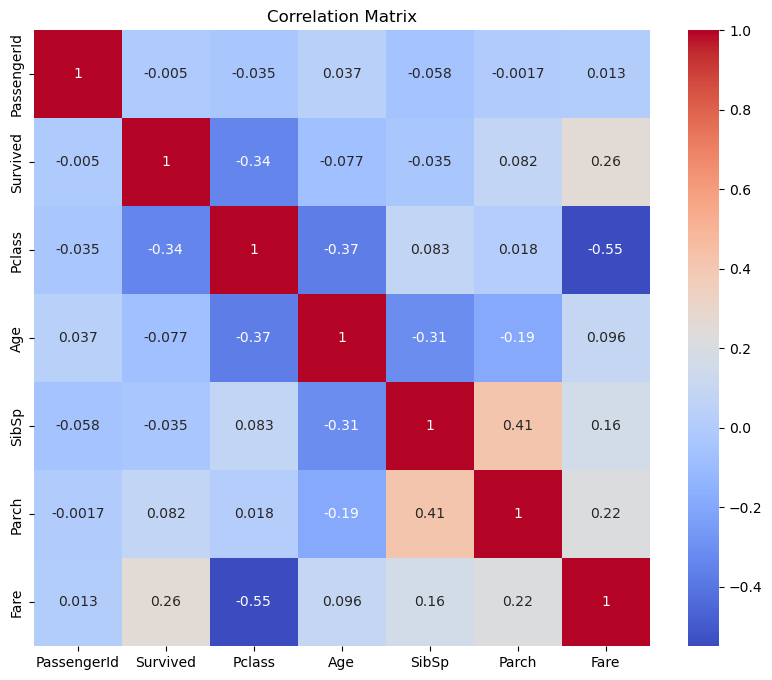

In [21]:

# Correlation matrix (static)
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


In [22]:

# Missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:

# Outlier detection (IQR method)
print("\nOutliers detected (IQR method):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} potential outliers")



Outliers detected (IQR method):
PassengerId: 0 potential outliers
Survived: 0 potential outliers
Pclass: 0 potential outliers
Age: 11 potential outliers
SibSp: 46 potential outliers
Parch: 213 potential outliers
Fare: 116 potential outliers


In [24]:

# OPTIONAL: Plotly scatter matrix (interactive, won't show on GitHub but nice for local viewing)
try:
    import plotly.express as px
    fig = px.scatter_matrix(df, dimensions=numeric_cols, title="Scatter Matrix (Interactive)")
    fig.show()
except ImportError:
    print("Plotly not installed or cannot render interactive charts in this environment.")
